This script generates the plots for TEER experiments

In [1]:
import numpy

In [2]:
import scipy, scipy.stats

In [3]:
import matplotlib, matplotlib.pyplot
matplotlib.rcParams.update({'font.size':20, 
                            'font.family':'sans-serif', 
                            'xtick.labelsize':16, 
                            'ytick.labelsize':16, 
                            'figure.figsize':(16*(2/3), 9*(2/3)), 
                            'axes.labelsize':20
                           })

In [4]:
t = [0, 1, 4, 24]

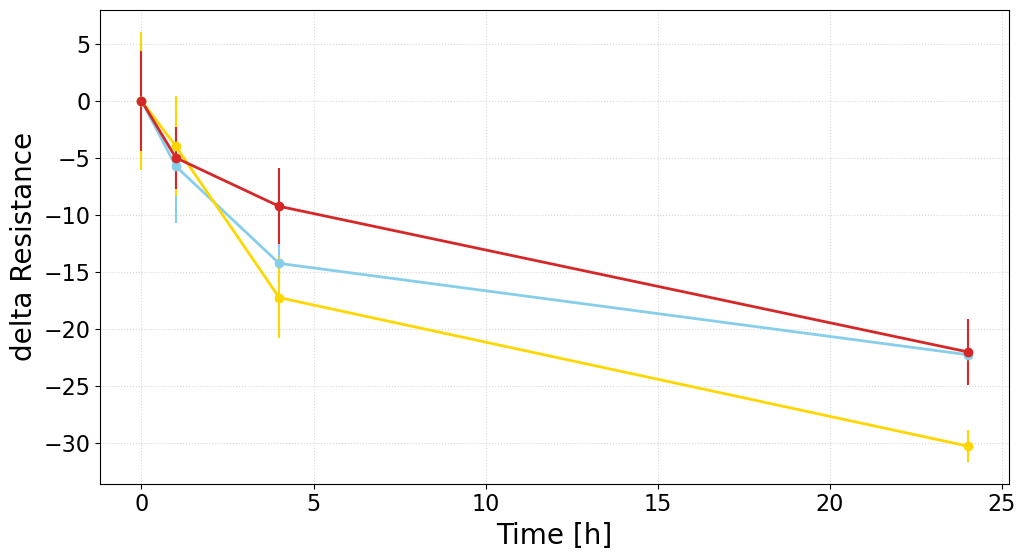

In [5]:
exp_069_nt = [
    [30, 24, 19, 11],
    [24, 20, 18, 8],
    [33, 33, 15, 5],
    [35, 22, 13, 9]
]
exp_069_half = [
    [36,27, 19, 7],
    [36, 37, 21, 3],
    [26, 27, 12, 5],
    [43, 34, 20, 5]
]
exp_069_five = [
    [29, 12, 12, 4],
    [18, 19, 7, -1],
    [20, 17, 16, -1],
    [19, 18, 14, -4]
]

### plot

a = numpy.mean(exp_069_nt, axis=0)
b = numpy.std(exp_069_nt, axis=0)
c = a - a[0]
matplotlib.pyplot.plot(t, c, color='skyblue', lw=2)
matplotlib.pyplot.errorbar(t, c, b, fmt='o', color='skyblue')

a = numpy.mean(exp_069_half, axis=0)
b = numpy.std(exp_069_half, axis=0)
c = a - a[0]
matplotlib.pyplot.plot(t, c, color='gold', lw=2)
matplotlib.pyplot.errorbar(t, c, b, fmt='o', color='gold')

a = numpy.mean(exp_069_five, axis=0)
b = numpy.std(exp_069_five, axis=0)
c = a - a[0]
matplotlib.pyplot.plot(t, c, color='tab:red', lw=2)
matplotlib.pyplot.errorbar(t, c, b, fmt='o', color='tab:red')

matplotlib.pyplot.xlabel('Time [h]')
matplotlib.pyplot.ylabel('delta Resistance')

matplotlib.pyplot.grid(alpha=0.5, ls=':')
matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()

[[ -2.   2.  -6. -43.]
 [  2.   0.  -6. -42.]
 [ -3.  -1. -11. -29.]
 [  3.   1. -13. -29.]]
[[  0.5  -3.5  -6.5 -26.5]
 [ -2.5   2.5 -17.5 -26.5]
 [  1.5  -1.5 -10.5 -37.5]
 [  0.5  -3.5 -17.5 -42.5]]
[[ -2.   0. -17. -48.]
 [  3.  -1. -15. -45.]
 [  0.  -4. -14. -56.]
 [ -1.  -4. -14. -49.]]
0
[ 0.5 -2.5  1.5  0.5]
[-2.  3.  0. -1.]
time point 0; concentration half; significance 0.8845
time point 0; concentration five; significance 0.8839
1
[-3.5  2.5 -1.5 -3.5]
[ 0. -1. -4. -4.]
time point 1; concentration half; significance 0.3094
time point 1; concentration five; significance 0.1059
2
[ -6.5 -17.5 -10.5 -17.5]
[-17. -15. -14. -14.]
time point 4; concentration half; significance 0.3065
time point 4; concentration five; significance 0.0284
3
[-26.5 -26.5 -37.5 -42.5]
[-48. -45. -56. -49.]
time point 24; concentration half; significance 0.4651
time point 24; concentration five; significance 0.0294


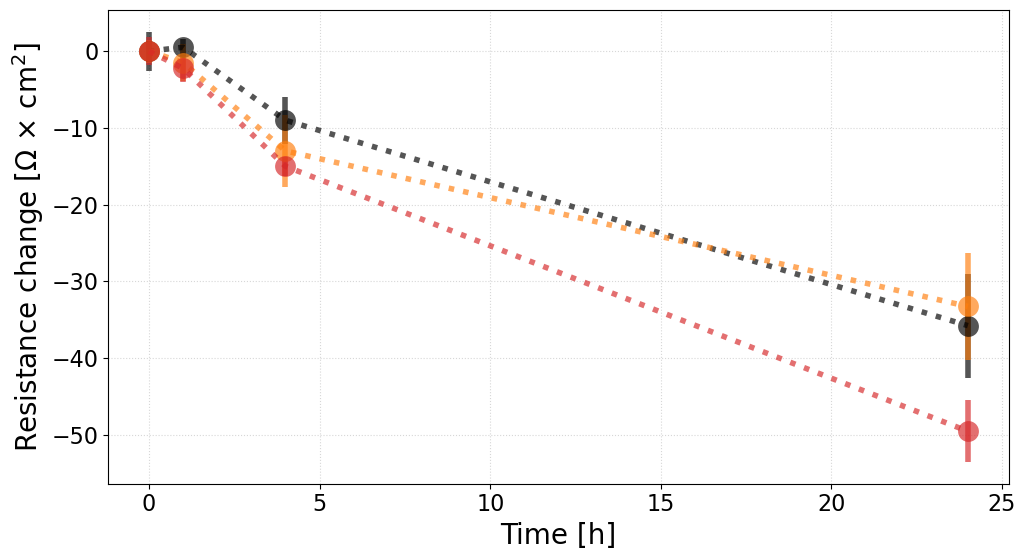

In [6]:
exp_070_nt = [
    [23, 27, 19, -18],
    [27, 25, 19, -17],
    [22, 24, 14, -4],
    [28, 26, 12, -4]
]
exp_070_half = [
    [27, 23, 20, 0],
    [24, 29, 9, 0],
    [28, 25, 16, -11],
    [27, 23, 9, -16]
]
exp_070_five = [
    [19, 21, 4, -27],
    [24, 20, 6, -24],
    [21, 17, 7, -35],
    [20, 17, 7, -28]
]

#
# bring them all to the t = 0 reference
#
normalize_nt = numpy.array(exp_070_nt) - numpy.mean(exp_070_nt, axis=0)[0]
normalize_half = numpy.array(exp_070_half) - numpy.mean(exp_070_half, axis=0)[0]
normalize_five = numpy.array(exp_070_five) - numpy.mean(exp_070_five, axis=0)[0]
print(normalize_nt)
print(normalize_half)
print(normalize_five)

#
# tests
#
for i in range(3+1):
    print(i)
    reference = numpy.array(normalize_nt)[:, i]
    half = numpy.array(normalize_half)[:, i]
    five = numpy.array(normalize_five)[:, i]
    print(half)
    print(five)
    results = scipy.stats.mannwhitneyu(reference, half)
    print('time point {}; concentration half; significance {:.4f}'.format(t[i], results.pvalue))
    results = scipy.stats.mannwhitneyu(reference, five)
    print('time point {}; concentration five; significance {:.4f}'.format(t[i], results.pvalue))
    

#
# plot
#

a = numpy.mean(normalize_nt, axis=0)
b = numpy.std(normalize_nt, axis=0)
matplotlib.pyplot.errorbar(t, a, b, fmt='o', color='black', linestyle='dotted', markersize=15, lw=4, alpha=2/3, markeredgewidth=0)

a = numpy.mean(normalize_half, axis=0)
b = numpy.std(normalize_half, axis=0)
matplotlib.pyplot.errorbar(t, a, b, fmt='o', color='tab:orange', linestyle='dotted', markersize=15, lw=4, alpha=2/3, markeredgewidth=0)

a = numpy.mean(normalize_five, axis=0)
b = numpy.std(normalize_five, axis=0)
matplotlib.pyplot.errorbar(t, a, b, fmt='o', color='tab:red', linestyle='dotted', markersize=15, lw=4, alpha=2/3, markeredgewidth=0)

matplotlib.pyplot.xlabel('Time [h]')
matplotlib.pyplot.ylabel('Resistance change [Ω × cm$^2$]')

matplotlib.pyplot.grid(alpha=0.5, ls=':')
matplotlib.pyplot.tight_layout()

#matplotlib.pyplot.show()

matplotlib.pyplot.savefig('teer.svg')

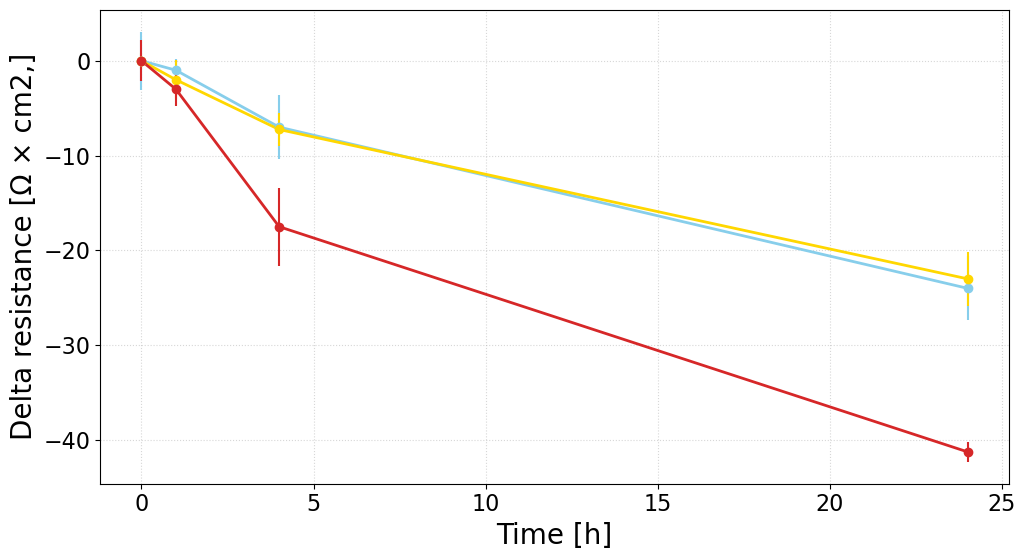

In [7]:
exp_071_nt = [
    [20, 21, 14, -7],
    [19, 19, 19, 0],
    [22, 22, 10, 2],
    [27, 22, 17, -3]
]
exp_071_half = [
    [28, 25, 20, 5],
    [28, 24, 19, 10],
    [30, 29, 23, 5],
    [28, 28, 23, 2]
]
exp_071_five = [
    [14, 12, -7, -24],
    [18, 17, 3, -25],
    [20, 15, 3, -22],
    [18, 14, 1, -24]
]

### plot

a = numpy.mean(exp_071_nt, axis=0)
b = numpy.std(exp_071_nt, axis=0)
c = a - a[0]
matplotlib.pyplot.plot(t, c, color='skyblue', lw=2)
matplotlib.pyplot.errorbar(t, c, b, fmt='o', color='skyblue')

a = numpy.mean(exp_071_half, axis=0)
b = numpy.std(exp_071_half, axis=0)
c = a - a[0]
matplotlib.pyplot.plot(t, c, color='gold', lw=2)
matplotlib.pyplot.errorbar(t, c, b, fmt='o', color='gold')

a = numpy.mean(exp_071_five, axis=0)
b = numpy.std(exp_071_five, axis=0)
c = a - a[0]
matplotlib.pyplot.plot(t, c, color='tab:red', lw=2)
matplotlib.pyplot.errorbar(t, c, b, fmt='o', color='tab:red')

matplotlib.pyplot.xlabel('Time [h]')
matplotlib.pyplot.ylabel('Delta resistance [Ω × cm2,]')

matplotlib.pyplot.grid(alpha=0.5, ls=':')
matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()

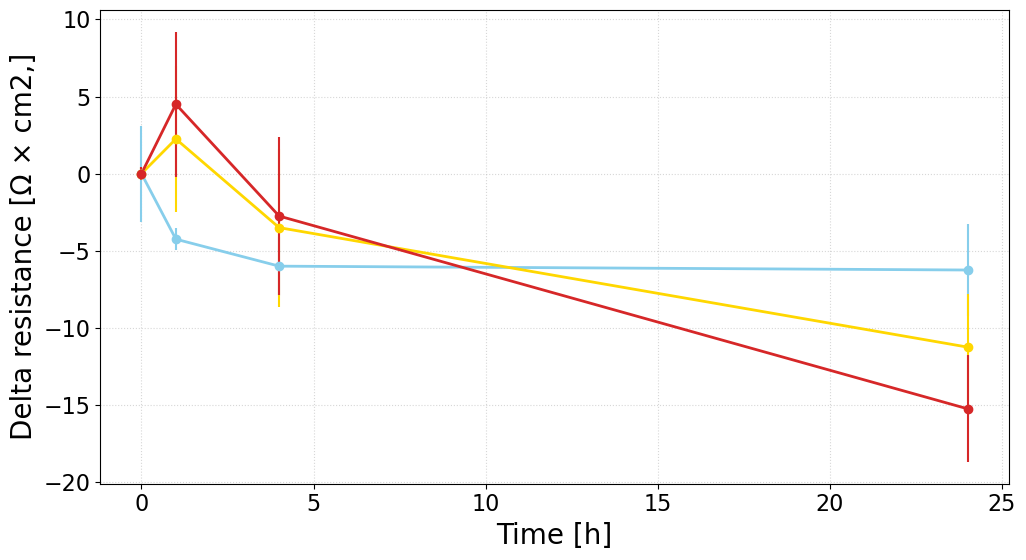

In [8]:
exp_074_nt = [
    [17, 18, 13, 13],
    [25, 17, 17, 19],
    [23, 18, 17, 19],
    [24, 19, 18, 13]
]
exp_074_half = [
    [27, 28, 32, 18],
    [28, 24, 22, 18],
    [27, 37, 18, 10],
    [27, 29, 23, 18]
]
exp_074_five = [
    [17, 21, 13, 0],
    [17, 22, 13, 4],
    [18, 22, 18, 0],
    [18, 23, 15, 5]
]

#
# plot
#

a = numpy.mean(exp_074_nt, axis=0)
b = numpy.std(exp_074_nt, axis=0)
c = a - a[0]
matplotlib.pyplot.plot(t, c, color='skyblue', lw=2)
matplotlib.pyplot.errorbar(t, c, b, fmt='o', color='skyblue')

a = numpy.mean(exp_074_half, axis=0)
b = numpy.std(exp_074_half, axis=0)
c = a - a[0]
matplotlib.pyplot.plot(t, c, color='gold', lw=2)
matplotlib.pyplot.errorbar(t, c, b, fmt='o', color='gold')

a = numpy.mean(exp_074_five, axis=0)
b = numpy.std(exp_074_half, axis=0)
c = a - a[0]
matplotlib.pyplot.plot(t, c, color='tab:red', lw=2)
matplotlib.pyplot.errorbar(t, c, b, fmt='o', color='tab:red')

matplotlib.pyplot.xlabel('Time [h]')
matplotlib.pyplot.ylabel('Delta resistance [Ω × cm2,]')

matplotlib.pyplot.grid(alpha=0.5, ls=':')
matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()